In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [2]:
data=load_iris()
X=data.data
y=data.target
features=data.feature_names

In [3]:
df=pd.DataFrame(X,columns=features)
df['species']=data.target_names[y]
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [4]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

In [5]:
cov_matrix=np.cov(X_std.T)
print("covariance matrix",cov_matrix)

covariance matrix [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [6]:
eigen_vals,eigen_vecs=np.linalg.eig(cov_matrix)
print("eigenvalues", eigen_vals)
print("eigenvectors", eigen_vecs)

eigenvalues [2.93808505 0.9201649  0.14774182 0.02085386]
eigenvectors [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [7]:
sorted_idx=np.argsort(eigen_vals)[::-1]
sorted_vecs=eigen_vecs[:,sorted_idx]

In [9]:
X_pca=np.dot(X_std,sorted_vecs[:,:2])

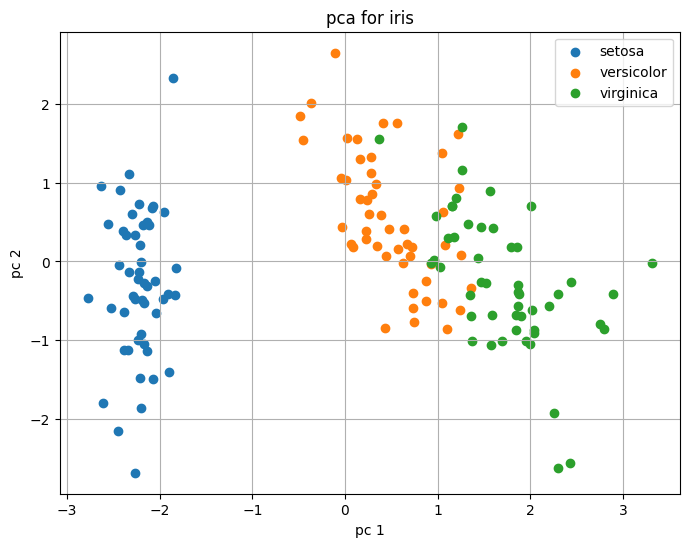

In [10]:
plt.figure(figsize=(8, 6))
for label,name in zip([0, 1, 2],data.target_names):
    plt.scatter(X_pca[y == label, 0], X_pca[y ==label,1],label=name)
plt.xlabel('pc 1')
plt.ylabel('pc 2')
plt.title('pca for iris')
plt.legend()
plt.grid(True)
plt.show()